In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import folium
import matplotlib.pyplot as plt

In [2]:
restaurant = pd.read_csv("/content/Dataset .csv")
restaurant.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


Table Booking and Online Delivery

In [3]:
value =  restaurant.groupby('Has Table booking')['Has Online delivery'].value_counts(normalize = True) *100
percentage = value.get('Yes', 0)[1]
print("Percentage of restaurants that offer table booking and online delivery : ", percentage)

Percentage of restaurants that offer table booking and online delivery :  37.56476683937824


In [4]:
avg_rating_with_table_booking = restaurant[restaurant['Has Table booking'] == 'Yes']['Aggregate rating'].mean()
print('Average rating for restaurants with table booking : ', avg_rating_with_table_booking)
avg_rating_without_table_booking = restaurant[restaurant['Has Table booking'] == 'No']['Aggregate rating'].mean()
print('Average rating for restaurants without table booking : ', avg_rating_without_table_booking)

Average rating for restaurants with table booking :  3.4419689119170984
Average rating for restaurants without table booking :  2.559358989634219


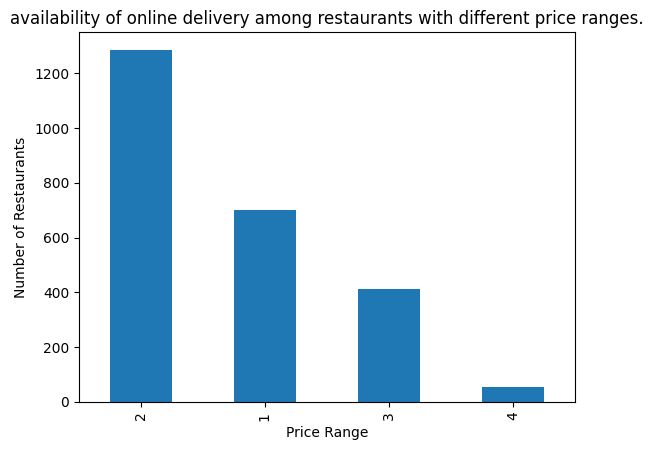

In [14]:
availability = restaurant[restaurant['Has Online delivery'] == 'Yes']['Price range'].value_counts()
availability.plot(kind = 'bar')
plt.title('availability of online delivery among restaurants with different price ranges.')
plt.xlabel('Price Range')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation = 90)
plt.show()

Price Range Analysis

In [38]:
common_price = restaurant['Price range'].mode()[0]

print(f"The most common price range among all the restaurants is : {common_price} ")

The most common price range among all the restaurants is : 1 


In [37]:
print("The average rating for each price range :")

ava_price = restaurant.groupby('Price range')['Aggregate rating'].mean().reset_index()

ava_price

The average rating for each price range :


,Price range,Aggregate rating
0,1,1.999887
1,2,2.941054
2,3,3.683381
3,4,3.817918


In [36]:
highest_avg_rating_price_range_value = ava_price['Price range'].idxmax()

color_associated = restaurant[restaurant['Price range'] == highest_avg_rating_price_range_value]['Rating color'].mode()[0]

print(f"The color that represents the highest average rating among different price ranges is: {color_associated}")

The color that represents the highest average rating among different price ranges is: Yellow


Feature Engineering

In [40]:
restaurant['Restaurant Name Length'] = restaurant['Restaurant Name'].apply(len)
restaurant['Address Length'] = restaurant['Address'].apply(len)
restaurant.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Restaurant Name Length,Address Length
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,No,No,No,3,4.8,Dark Green,Excellent,314,16,71
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,No,No,No,3,4.5,Dark Green,Excellent,591,16,67
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,No,No,No,4,4.4,Green,Very Good,270,22,56
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,4,4.9,Dark Green,Excellent,365,4,70
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,No,No,No,4,4.8,Dark Green,Excellent,229,11,64


In [41]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
restaurant['Has Table booking'] = lb.fit_transform(restaurant['Has Table booking'])
restaurant['Has Online delivery'] = lb.fit_transform(restaurant['Has Online delivery'])
restaurant['Restaurant Name'] =  lb.fit_transform(restaurant['Restaurant Name'])
restaurant['City'] = lb.fit_transform(restaurant['City'])
restaurant['Cuisines'] = lb.fit_transform(restaurant['Cuisines'])
restaurant['Currency'] = lb.fit_transform(restaurant['Currency'])
restaurant['Is delivering now'] = lb.fit_transform(restaurant['Is delivering now'])
restaurant['Switch to order menu'] = lb.fit_transform(restaurant['Switch to order menu'])
restaurant['Rating color'] = lb.fit_transform(restaurant['Rating color'])
restaurant['Rating text'] = lb.fit_transform(restaurant['Rating text'])

restaurant.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Restaurant Name Length,Address Length
0,6317637,3748,162,73,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,920,...,0,0,0,3,4.8,0,1,314,16,71
1,6304287,3172,162,73,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,1111,...,0,0,0,3,4.5,0,1,591,16,67
2,6300002,2896,162,75,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,1671,...,0,0,0,4,4.4,1,5,270,22,56
3,6318506,4707,162,75,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,1126,...,0,0,0,4,4.9,0,1,365,4,70
4,6314302,5523,162,75,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,1122,...,0,0,0,4,4.8,0,1,229,11,64
